Insight 2: "Does Bitcoin exhibits higher volatility compared to the S&P 500, especially in recent years? (Monthy and Yearly)"

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

# Convert the date columns to datetime for proper handling
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Ensure the datsets are aligned by date
btc_data = btc_data.set_index('Date').sort_index()
sp500_data = sp500_data.set_index('Date').sort_index()

# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

In [7]:
# Resample data to monthly frequency and calculate standard deviation (volatility)
btc_monthly_volatility = btc_data['BTC_Price'].resample('ME').std()
sp500_monthly_volatility = sp500_data['SP500_Price'].resample('ME').std()

# Calculate annualized standard deviation (volatility)
btc_annual_volatility = btc_data['BTC_Price'].resample('YE').std()
sp500_annual_volatitliy = sp500_data['SP500_Price'].resample('YE').std()

In [20]:
# Combine results into a DataFrame for easy comparison
volatility_comparasion_monthly = pd.DataFrame({
  'BTC Monthly Volatility': btc_monthly_volatility,
  'S&P 500 Monthly Volatility': sp500_monthly_volatility
}).dropna()

volatility_comparasion_annual = pd.DataFrame({
  'BTC Annual Volatility': btc_annual_volatility,
  'S&P 500 Monthly Volatitliy': sp500_annual_volatitliy
}).dropna()
volatility_comparasion_monthly

,BTC Monthly Volatility,S&P 500 Monthly Volatility
Date,,
2014-09-30,19.333508,16.126224
2014-10-31,20.786979,43.663121
2014-11-30,26.645275,17.728770
2014-12-31,23.902759,33.394840
2015-01-31,36.022210,21.994332
...,...,...
2023-12-31,1290.027222,83.259249
2024-01-31,2274.734789,73.631047
2024-02-29,5767.272850,55.635652


Creating the graphs for the BTC and S&P 500 volatility

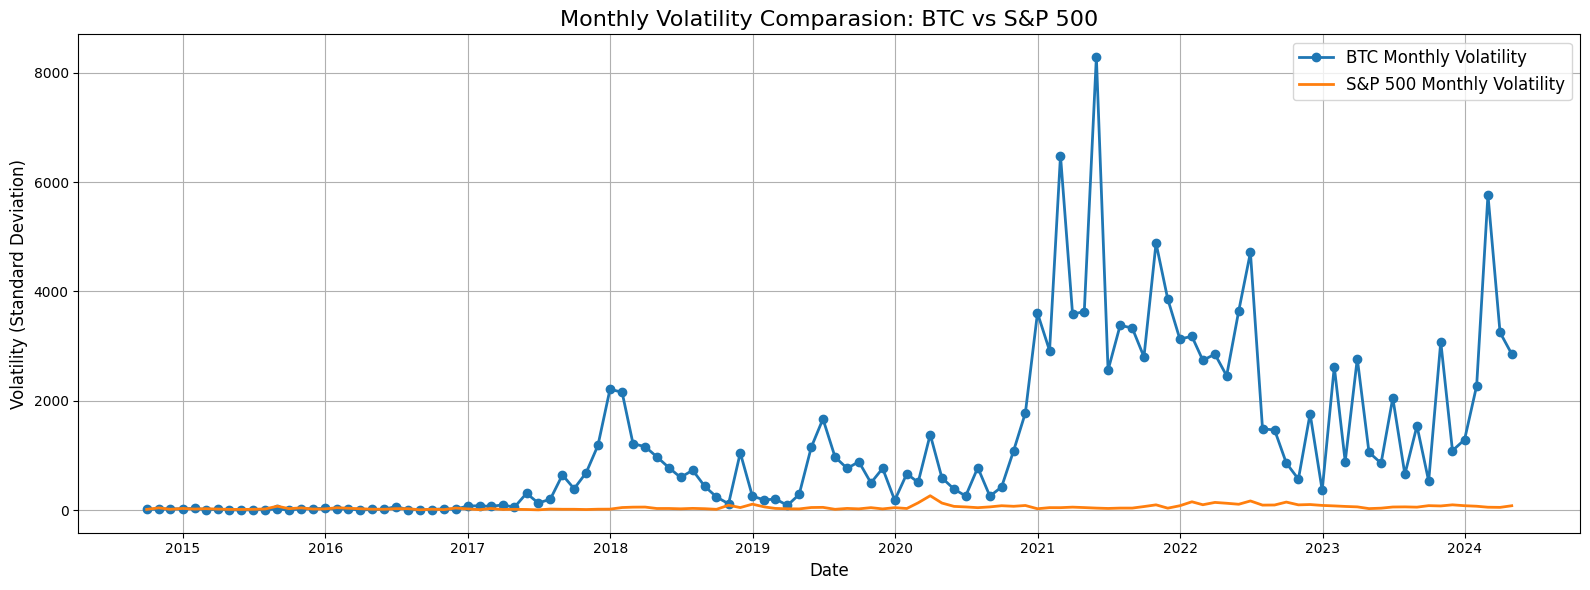

In [34]:
# Plot Monthly Volatility
plt.figure(figsize=(16, 6))
plt.plot(volatility_comparasion_monthly.index, volatility_comparasion_monthly['BTC Monthly Volatility'],
         label='BTC Monthly Volatility', linewidth=2, linestyle='solid', marker='o')
plt.plot(volatility_comparasion_monthly.index, volatility_comparasion_monthly['S&P 500 Monthly Volatility'],
         label='S&P 500 Monthly Volatility', linewidth=2, linestyle='solid')
plt.title('Monthly Volatility Comparasion: BTC vs S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (Standard Deviation)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


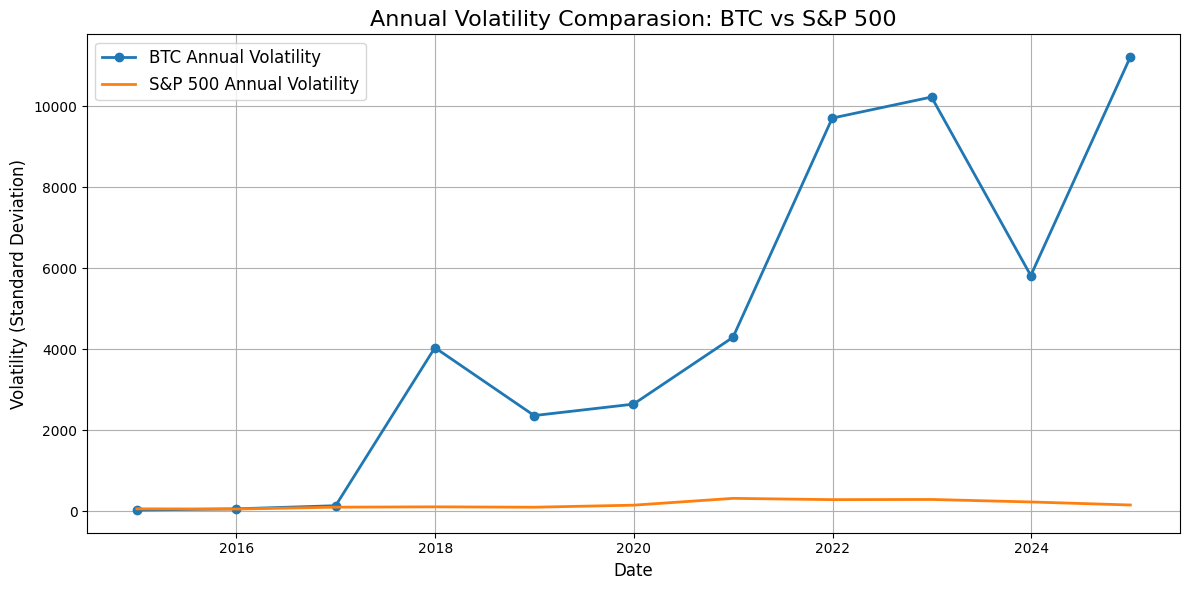

In [35]:
# Plot Annual Volatility
plt.figure(figsize=(12, 6))
plt.plot(volatility_comparasion_annual.index, volatility_comparasion_annual['BTC Annual Volatility'],
         label='BTC Annual Volatility', linewidth=2, linestyle='solid', marker='o')
plt.plot(volatility_comparasion_annual.index, volatility_comparasion_annual['S&P 500 Monthly Volatitliy'],
         label='S&P 500 Annual Volatility', linewidth=2, linestyle='solid')
plt.title('Annual Volatility Comparasion: BTC vs S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility (Standard Deviation)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()